In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [2]:
!pip install folium
import folium

     |████████████████████████████████| 93 kB 4.0 MB/s  eta 0:00:01


## 1. Get All City Name From Internet

In [3]:
import requests
import lxml.html as lh

In [4]:
import pandas as pd
import numpy as np
import requests

from bs4 import BeautifulSoup


source = requests.get('https://namecensus.com/igapo/zip_codes/metropolitan-areas/metro-alpha/Dallas-Fort%20Worth%20(TX)1.html').text

soup = BeautifulSoup(source, 'html5lib')

In [5]:
postal_codes_dict = {} # initialize an empty dictionary to save the data in
for tr in soup.find_all('tr'):
    tds = tr.find_all('td')
    row = [i.text for i in tds]
    if(len(row)>0):
        raw = row[0]
        post_code = raw[0:5]
        borogh = raw[6:len(raw)]
        postal_codes_dict[post_code] = borogh
        
postal_codes_dict

{'75001': 'Addison',
 '75002': 'Lucas',
 '75013': 'Allen',
 '75409': 'Anna',
 '76226': 'Lantana',
 '75751': 'Walton',
 '75752': 'Athens',
 '76227': 'Savannah',
 '76623': 'Avalon',
 '75180': 'Mesquite',
 '75181': 'Mesquite',
 '75283': 'Dallas',
 '75284': 'Dallas',
 '75285': 'Dallas',
 '75286': 'Dallas',
 '75303': 'Dallas',
 '75373': 'Dallas',
 '75397': 'Dallas',
 '75101': 'Bardwell',
 '75424': 'Blue Ridge',
 '75756': 'Brownsboro',
 '75080': 'Richardson',
 '75135': 'Caddo Mills',
 '75422': 'Campbell',
 '75006': 'Carrollton',
 '75007': 'Carrollton',
 '75010': 'Carrollton',
 '75011': 'Carrollton',
 '75104': 'Cedar Hill',
 '75106': 'Cedar Hill',
 '75423': 'Celeste',
 '75009': 'Celina',
 '75758': 'Chandler',
 '75391': 'Dallas',
 '75211': 'Dallas',
 '75159': 'Seagoville',
 '75428': 'Commerce',
 '75429': 'Commerce',
 '75121': 'Copeville',
 '75019': 'Coppell',
 '75099': 'USPS Official Mail',
 '75077': 'Lewisville',
 '76208': 'Shady Shores',
 '76210': 'Denton',
 '75114': 'Crandall',
 '75201': 'D

In [6]:
# create an empty dataframe
columns = ['PostalCode','Borough']
dfw_data = pd.DataFrame(columns=columns)
dfw_data
# populate dataframe with data from dictionary
for ind, postal_code in enumerate(postal_codes_dict):
    borough = postal_codes_dict[postal_code]
    dfw_data = dfw_data.append({"PostalCode": postal_code, 
                                "Borough": borough},
                                ignore_index=True)

# print number of rows of dataframe
dfw_data

,PostalCode,Borough
0,75001,Addison
1,75002,Lucas
2,75013,Allen
3,75409,Anna
4,76226,Lantana
5,75751,Walton
6,75752,Athens
7,76227,Savannah
8,76623,Avalon
9,75180,Mesquite


In [7]:
dfw_borough = dfw_data['Borough'].unique()

## 2. Use Geopy To Get GPS Coordinate

In [8]:
!pip install geopandas
!pip install geopy

     |████████████████████████████████| 962 kB 17.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.4 MB 45.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 63.4 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 61.2 MB/s eta 0:00:01


In [9]:
import geopandas
import geopy

In [10]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Champ de Mars, Paris, France")

In [11]:
columns = ['Borough','Address','Latitude','Longitude']
dfw_location = pd.DataFrame(columns=columns)

In [12]:
for borough in dfw_borough:
    address = borough + ", Texas, United States of America"
    print(address)
    locator = Nominatim(user_agent="myGeocoder")
    location = locator.geocode(address)
    try:
        dfw_location = dfw_location.append({"Borough": borough,
                                "Address": address, 
                                "Latitude": location.latitude,
                                "Longitude": location.longitude},
                                ignore_index=True)
    except:
        pass

Addison, Texas, United States of America
Lucas, Texas, United States of America
Allen, Texas, United States of America
Anna, Texas, United States of America
Lantana, Texas, United States of America
Walton, Texas, United States of America
Athens, Texas, United States of America
Savannah, Texas, United States of America
Avalon, Texas, United States of America
Mesquite, Texas, United States of America
Dallas, Texas, United States of America
Bardwell, Texas, United States of America
Blue Ridge, Texas, United States of America
Brownsboro, Texas, United States of America
Richardson, Texas, United States of America
Caddo Mills, Texas, United States of America
Campbell, Texas, United States of America
Carrollton, Texas, United States of America
Cedar Hill, Texas, United States of America
Celeste, Texas, United States of America
Celina, Texas, United States of America
Chandler, Texas, United States of America
Seagoville, Texas, United States of America
Commerce, Texas, United States of America


In [32]:
dfw_location.head()

,Borough,Address,Latitude,Longitude
0,Addison,"Addison, Texas, United States of America",32.960431,-96.830260
1,Lucas,"Lucas, Texas, United States of America",33.084285,-96.576658
2,Allen,"Allen, Texas, United States of America",33.103174,-96.670550
3,Anna,"Anna, Texas, United States of America",33.349280,-96.549380
4,Lantana,"Lantana, Texas, United States of America",33.094028,-97.124497


 ## 3. Get Location Detail Info usng FourSquare

In [14]:
CLIENT_ID = 'QNUNRFBDVZ451JUF24DDP3LEVW0HNOBS1A2EUMKU0IC30AOO' # your Foursquare ID
CLIENT_SECRET = 'SMBJTHAJDEMWBMZHOV2I54QG0DOOBH0UNNQQNDJF2EKPLKUD' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QNUNRFBDVZ451JUF24DDP3LEVW0HNOBS1A2EUMKU0IC30AOO
CLIENT_SECRET:SMBJTHAJDEMWBMZHOV2I54QG0DOOBH0UNNQQNDJF2EKPLKUD


In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
dfw_venues = getNearbyVenues(names=dfw_location['Borough'],
                                   latitudes=dfw_location['Latitude'],
                                   longitudes=dfw_location['Longitude']
                                  )

Addison
Lucas
Allen
Anna
Lantana
Walton
Athens
Savannah
Avalon
Mesquite
Dallas
Bardwell
Blue Ridge
Brownsboro
Richardson
Caddo Mills
Campbell
Carrollton
Cedar Hill
Celeste
Celina
Chandler
Seagoville
Commerce
Copeville
Coppell
Lewisville
Shady Shores
Denton
Crandall
Village
Highland Park
North Branch
Prestonwood
Kleberg
DFW Airport
TU Electric
Mellon
Wells Fargo Bank
Gulf Oil
Sears
PNC Bank
UT Sw Medical Center
GTE
SBC ATT
Desoto
Duncanville
Elmo
Mabank
Ennis
Eustace
McKinney
Farmersville
Fate
Ferris
Greenville
Heathridge
Forreston
Frisco
Garland
Sachse
Red Oak
Grand Prairie
Rockwall
Lake Dallas
Hutchins
Irving
Neiman Marcus
Italy
Milford
Josephine
Justin
Kaufman
Westlake
Tool
Krum
Oak Point
Lancaster
New York
Lavon
Opelika
The Colony
Louisville
Malakoff
Lone Oak
Maypearl
Melissa
Merit
Sunnyvale
Midlothian
Plano
Nevada
Palmer
Pilot Point
Ponder
Poynor
Princeton
Prosper
West Tawakoni
Rice
Rosser
Rowlett
Royse City
Wylie
Sanger
Scurry
Terrell
Trinidad
Waxahachie
Westminster
Weston
Wilmer


In [17]:
dfw_venues.head()

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Addison,32.960431,-96.83026,Addison Circle Park,32.960917,-96.826488,Park
1,Addison,32.960431,-96.83026,WaterTower Theatre,32.962105,-96.828262,Performing Arts Venue
2,Addison,32.960431,-96.83026,Antonio Ristorante,32.961468,-96.826096,Italian Restaurant
3,Addison,32.960431,-96.83026,Gaia Flow Yoga,32.960921,-96.823957,Yoga Studio
4,Addison,32.960431,-96.83026,Texas de Brazil,32.954592,-96.830206,Brazilian Restaurant


## Clean  Data And Exploratory Data Analysis

In [18]:
# one hot encoding
dfw_onehot = pd.get_dummies(dfw_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dfw_onehot['Borough'] = dfw_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [dfw_onehot.columns[-1]] + list(dfw_onehot.columns[:-1])
dfw_onehot = dfw_onehot[fixed_columns]

dfw_onehot.head()

,Borough,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Capitol Building,Car Wash,Caribbean Restaurant,Carpet Store,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Basketball Court,College Bookstore,College Gym,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Government Building,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Library,Light Rail Station,Lighting Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorsports Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pizza Place,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Rest Area,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Travel & Transport,Travel Lounge,Tree,Vegetarian / Vegan Restaurant,Vehicle Inspection Station,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Water Park,Weight Loss Center,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Addison,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [96]:
dfw_grouped = dfw_onehot.groupby('Borough').mean().reset_index()
dfw_grouped.head()

,Borough,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Capitol Building,Car Wash,Caribbean Restaurant,Carpet Store,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Basketball Court,College Bookstore,College Gym,College Quad,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Government Building,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Library,Light Rail Station,Lighting Store,Liquor Store,Locksmith,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorsports Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pizza Place,Playground,Plaza,Pool,Post Office,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Rest Area,Restaurant,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Travel & Transport,Travel Lounge,Tree,Vegetarian / Vegan Restaurant,Vehicle Inspection Station,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Water Park,Weight Loss Center,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Addison,0.0,0.0,0.010989,0.0,0.0,0.0,0.0,0.0,0.0,0.054945,0.000000,0.000000,0.0,0.0,0.0,0.032967,0.010989,0.0,0.0,0.0,0.0,0.000000,0.0,0.021978,0.000000,0.021978,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = dfw_grouped['Borough']

for ind in np.arange(dfw_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dfw_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Addison,Hotel,Mexican Restaurant,American Restaurant,Italian Restaurant,Coffee Shop,Asian Restaurant,Rental Car Location,Park,Steakhouse,Seafood Restaurant
1,Allen,Fast Food Restaurant,Mexican Restaurant,Gym / Fitness Center,Donut Shop,Pizza Place,Restaurant,BBQ Joint,Breakfast Spot,Hotel,Asian Restaurant
2,Anna,Pizza Place,American Restaurant,Intersection,Discount Store,Italian Restaurant,Burger Joint,Gas Station,Fast Food Restaurant,Event Space,Event Service
3,Athens,American Restaurant,Mexican Restaurant,Grocery Store,Pizza Place,Fast Food Restaurant,Pharmacy,Italian Restaurant,Mobile Phone Shop,Burger Joint,Donut Shop
4,Avalon,Home Service,Post Office,Historic Site,Health & Beauty Service,Fast Food Restaurant,Farmers Market,Farm,Fabric Shop,Event Space,Event Service


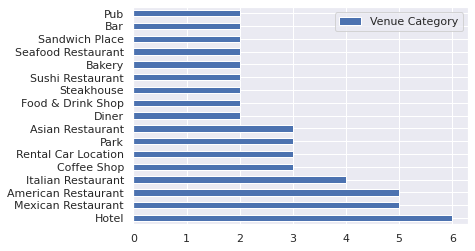

In [95]:
dfw_venues.groupby('Borough')['Venue Category'].value_counts()
dfw_venues_addison = dfw_venues[dfw_venues['Borough'] == 'Addison']
addison_venue_counts = dfw_venues_addison['Venue Category'].value_counts().to_frame()
addison_top_venues = addison_venue_counts[addison_venue_counts['Venue Category'] >1 ]
ax = addison_top_venues.plot.barh(rot=0)

In [22]:
# set number of clusters
kclusters = 5

dfw_grouped_clustering = dfw_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dfw_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 1, 1, 3, 0, 0, 0], dtype=int32)

In [23]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

dfw_merged = dfw_location

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
dfw_merged = dfw_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')

dfw_merged.head() # check the last columns!

,Borough,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Addison,"Addison, Texas, United States of America",32.960431,-96.830260,0.0,Hotel,Mexican Restaurant,American Restaurant,Italian Restaurant,Coffee Shop,Asian Restaurant,Rental Car Location,Park,Steakhouse,Seafood Restaurant
1,Lucas,"Lucas, Texas, United States of America",33.084285,-96.576658,0.0,Lake,Furniture / Home Store,Massage Studio,Martial Arts School,Ethiopian Restaurant,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Yoga Studio
2,Allen,"Allen, Texas, United States of America",33.103174,-96.670550,0.0,Fast Food Restaurant,Mexican Restaurant,Gym / Fitness Center,Donut Shop,Pizza Place,Restaurant,BBQ Joint,Breakfast Spot,Hotel,Asian Restaurant
3,Anna,"Anna, Texas, United States of America",33.349280,-96.549380,0.0,Pizza Place,American Restaurant,Intersection,Discount Store,Italian Restaurant,Burger Joint,Gas Station,Fast Food Restaurant,Event Space,Event Service
4,Lantana,"Lantana, Texas, United States of America",33.094028,-97.124497,0.0,Trail,Sandwich Place,Italian Restaurant,Tennis Court,Wine Bar,Gym,Restaurant,Golf Course,Convenience Store,Nightclub


In [97]:
dfw_merged.head()

,Borough,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Addison,"Addison, Texas, United States of America",32.960431,-96.830260,0.0,Hotel,Mexican Restaurant,American Restaurant,Italian Restaurant,Coffee Shop,Asian Restaurant,Rental Car Location,Park,Steakhouse,Seafood Restaurant
1,Lucas,"Lucas, Texas, United States of America",33.084285,-96.576658,0.0,Lake,Furniture / Home Store,Massage Studio,Martial Arts School,Ethiopian Restaurant,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Yoga Studio
2,Allen,"Allen, Texas, United States of America",33.103174,-96.670550,0.0,Fast Food Restaurant,Mexican Restaurant,Gym / Fitness Center,Donut Shop,Pizza Place,Restaurant,BBQ Joint,Breakfast Spot,Hotel,Asian Restaurant
3,Anna,"Anna, Texas, United States of America",33.349280,-96.549380,0.0,Pizza Place,American Restaurant,Intersection,Discount Store,Italian Restaurant,Burger Joint,Gas Station,Fast Food Restaurant,Event Space,Event Service
4,Lantana,"Lantana, Texas, United States of America",33.094028,-97.124497,0.0,Trail,Sandwich Place,Italian Restaurant,Tennis Court,Wine Bar,Gym,Restaurant,Golf Course,Convenience Store,Nightclub


In [25]:
dfw_merged.dropna().sort_values(by = ['Cluster Labels'])

,Borough,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Addison,"Addison, Texas, United States of America",32.960431,-96.830260,0.0,Hotel,Mexican Restaurant,American Restaurant,Italian Restaurant,Coffee Shop,Asian Restaurant,Rental Car Location,Park,Steakhouse,Seafood Restaurant
75,Krum,"Krum, Texas, United States of America",33.261836,-97.237467,0.0,Italian Restaurant,Home Service,Convenience Store,Electronics Store,Baseball Field,Tree,Food Service,Diner,Construction & Landscaping,Gym / Fitness Center
74,Tool,"Tool, Texas, United States of America",32.272027,-96.173273,0.0,Donut Shop,Electronics Store,Convenience Store,Yoga Studio,Event Space,Dive Bar,Dry Cleaner,Ethiopian Restaurant,Event Service,Fabric Shop
73,Westlake,"Westlake, Texas, United States of America",32.991226,-97.194370,0.0,Liquor Store,Mexican Restaurant,Convenience Store,Italian Restaurant,Sushi Restaurant,Gun Shop,BBQ Joint,Botanical Garden,Fast Food Restaurant,Farmers Market
72,Kaufman,"Kaufman, Texas, United States of America",32.581021,-96.299271,0.0,Burger Joint,Liquor Store,Pizza Place,Department Store,Discount Store,American Restaurant,Yoga Studio,Donut Shop,Dry Cleaner,Electronics Store
71,Justin,"Justin, Texas, United States of America",33.084844,-97.296129,0.0,Shoe Store,Clothing Store,Gas Station,Diner,Discount Store,Burger Joint,Brewery,Mexican Restaurant,Sporting Goods Shop,Supermarket
67,Neiman Marcus,"Neiman Marcus, Texas, United States of America",29.739266,-95.461281,0.0,Clothing Store,Department Store,Hotel,American Restaurant,Women's Store,Coffee Shop,French Restaurant,Steakhouse,Ice Cream Shop,Italian Restaurant
66,Irving,"Irving, Texas, United States of America",32.829518,-96.944218,0.0,Discount Store,Park,American Restaurant,Fried Chicken Joint,Gas Station,Auto Workshop,Breakfast Spot,Athletics & Sports,Jewelry Store,Business Service
65,Hutchins,"Hutchins, Texas, United States of America",32.649300,-96.713052,0.0,Fast Food Restaurant,Post Office,Ice Cream Shop,Gas Station,Discount Store,Business Service,Liquor Store,Sandwich Place,Hotel,Ethiopian Restaurant
64,Lake Dallas,"Lake Dallas, Texas, United States of America",33.119287,-97.025564,0.0,Mexican Restaurant,Fast Food Restaurant,Furniture / Home Store,BBQ Joint,Italian Restaurant,Liquor Store,Food Truck,Bar,Sandwich Place,Discount Store


In [26]:
dfw_potential = dfw_merged[dfw_merged['Cluster Labels'] == 0]

In [27]:
dfw_potential

,Borough,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Addison,"Addison, Texas, United States of America",32.960431,-96.830260,0.0,Hotel,Mexican Restaurant,American Restaurant,Italian Restaurant,Coffee Shop,Asian Restaurant,Rental Car Location,Park,Steakhouse,Seafood Restaurant
1,Lucas,"Lucas, Texas, United States of America",33.084285,-96.576658,0.0,Lake,Furniture / Home Store,Massage Studio,Martial Arts School,Ethiopian Restaurant,Dive Bar,Donut Shop,Dry Cleaner,Electronics Store,Yoga Studio
2,Allen,"Allen, Texas, United States of America",33.103174,-96.670550,0.0,Fast Food Restaurant,Mexican Restaurant,Gym / Fitness Center,Donut Shop,Pizza Place,Restaurant,BBQ Joint,Breakfast Spot,Hotel,Asian Restaurant
3,Anna,"Anna, Texas, United States of America",33.349280,-96.549380,0.0,Pizza Place,American Restaurant,Intersection,Discount Store,Italian Restaurant,Burger Joint,Gas Station,Fast Food Restaurant,Event Space,Event Service
4,Lantana,"Lantana, Texas, United States of America",33.094028,-97.124497,0.0,Trail,Sandwich Place,Italian Restaurant,Tennis Court,Wine Bar,Gym,Restaurant,Golf Course,Convenience Store,Nightclub
6,Athens,"Athens, Texas, United States of America",32.204442,-95.854914,0.0,American Restaurant,Mexican Restaurant,Grocery Store,Pizza Place,Fast Food Restaurant,Pharmacy,Italian Restaurant,Mobile Phone Shop,Burger Joint,Donut Shop
9,Mesquite,"Mesquite, Texas, United States of America",32.766610,-96.599472,0.0,Pizza Place,Pharmacy,Discount Store,Pool,Mexican Restaurant,BBQ Joint,Bank,Taco Place,Football Stadium,Supermarket
10,Dallas,"Dallas, Texas, United States of America",32.776272,-96.796856,0.0,Hotel,Coffee Shop,Bar,Cocktail Bar,Gym,American Restaurant,Café,Seafood Restaurant,Plaza,Park
13,Brownsboro,"Brownsboro, Texas, United States of America",32.302371,-95.613572,0.0,Convenience Store,Mexican Restaurant,Discount Store,Sandwich Place,Café,Pizza Place,Fast Food Restaurant,Farm,Fabric Shop,Event Space
14,Richardson,"Richardson, Texas, United States of America",32.948179,-96.729721,0.0,Chinese Restaurant,Indian Restaurant,Bar,Rental Car Location,Burger Joint,Bakery,Mediterranean Restaurant,Coffee Shop,Sushi Restaurant,Ice Cream Shop


In [28]:
# need Grocery Store, Big Box Store, Supermarket, Asian Restaurant, Chinese Restaurant, Korean Restaurant,
# don't need Night Club, Bar
store = ['Grocery Store', 'Big Box Store', 'Supermarket', 'Food']
restaurant = ['Asian Restaurant', 'Chinese Restaurant', 'Korean Restaurant', 'Japanese Restaurant', 'Indian Restaurant', 'Sushi Restaurant', 'Dim Sum Restaurant']

In [102]:
good = []
for i in range(0,len(dfw_potential)):
    score = 0
    for j in range(5, 15):
        value = dfw_potential.iloc[i][j]
        if(value in store):
            score = score + 1
        if(value in restaurant):
            score = score + 1
            
    if(score > 1):
        good.append(dfw_potential.iloc[i][0])

In [103]:
good

['Richardson',
 'Carrollton',
 'Chandler',
 'Desoto',
 'Greenville',
 'Midlothian',
 'Rowlett']